In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ER Employment by Industry_November_2021.xlsx to ER Employment by Industry_November_2021.xlsx


In [ ]:
import io
Aus_Lab_Data = pd.read_excel(io.BytesIO(uploaded['ER Employment by Industry_November_2021.xlsx']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
#Aus_Lab_Data

In [ ]:
Aus_Lab_Data.drop('Employment Region',axis=1,inplace=True)
#Aus_Lab_Data.drop('State/Territory',axis=1,inplace=True)
#Aus_Lab_Data.head()

In [ ]:
Aus_Lab_Data.drop(Aus_Lab_Data.index[855:874],axis=0,inplace=True)

In [ ]:
Aus_Lab_Data

,State/Territory,Industry,Employment by Industry - Total,Employed Full-Time,Employed Part-Time,Employed - Male,Employed - Female,Five year growth by Industry,Employment Distribution (%)
0,NSW/ACT,"Agriculture, Forestry and Fishing",7200,3800,3400,3900,3300,1000,2.1
1,NSW/ACT,Mining,500,500,0,200,300,0,0.1
2,NSW/ACT,Manufacturing,7800,5900,2000,5500,2300,-1100,2.3
3,NSW/ACT,"Electricity, Gas, Water and Waste Services",2300,2000,300,1600,700,-600,0.7
4,NSW/ACT,Construction,28000,23700,4300,25400,2600,2600,8.3
...,...,...,...,...,...,...,...,...,...
850,NT,Public Administration and Safety,12200,11200,1000,5800,6400,-400,14.8
851,NT,Education and Training,6200,4700,1500,1800,4400,-300,7.5
852,NT,Health Care and Social Assistance,13500,10300,3200,3900,9500,4900,16.3
853,NT,Arts and Recreation Services,1800,900,900,800,1000,-300,2.2


In [ ]:
e=Aus_Lab_Data.groupby('Industry')['Employment by Industry - Total'].sum().sort_values(ascending = False)

In [ ]:
# top 5 largest employing industries
top_5=e.head(5)
top_5

Industry
Health Care and Social Assistance                  1807300
Retail Trade                                       1246500
Professional, Scientific and Technical Services    1204000
Construction                                       1104400
Education and Training                             1087600
Name: Employment by Industry - Total, dtype: int64

In [ ]:
df1=pd.DataFrame({'INDUSTRY':top_5.index, 'TOTAL':top_5.values})
df1
y=df1['TOTAL']
x=df1['INDUSTRY']

Text(0.5, 1.0, 'Top 5 highest employment rate in whole Labour Industry')

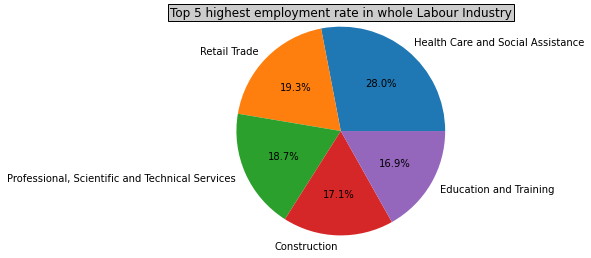

In [ ]:
import matplotlib.pyplot as plt
plt.pie(y,labels=x,radius=1.2,autopct='%1.1f%%')
plt.title("Top 5 highest employment rate in whole Labour Industry" , bbox={'facecolor':'0.8', 'pad':2})

In [ ]:
top_5_industries=['Health Care and Social Assistance','Retail Trade','Professional, Scientific and Technical Services','Construction','Education and Training']

In [ ]:
ll=Aus_Lab_Data.sort_values(by= 'Industry',ascending = True).groupby('Industry')['Employment by Industry - Total'].sum().head(20)

In [ ]:
ll

Industry
Accommodation and Food Services                     822600
Administrative and Support Services                 406600
Agriculture, Forestry and Fishing                   306300
Arts and Recreation Services                        227100
Construction                                       1104400
Education and Training                             1087600
Electricity, Gas, Water and Waste Services          141600
Financial and Insurance Services                    500200
Health Care and Social Assistance                  1807300
Information Media and Telecommunications            186800
Manufacturing                                       889800
Mining                                              228900
Other Services                                      510500
Professional, Scientific and Technical Services    1204000
Public Administration and Safety                    845800
Rental, Hiring and Real Estate Services             216200
Retail Trade                                   

In [ ]:
Aus_Lab_Data['Industry'] = Aus_Lab_Data['Industry'].replace(['Professional, Scientific and Technical Services'],'Prof_Tech_Emp_Services')

In [ ]:
#Aus_Lab_Data.head(20)

In [ ]:
Tech_Services = Aus_Lab_Data.loc[Aus_Lab_Data['Industry'] == 'Prof_Tech_Emp_Services']

In [ ]:
Tech_Services

,State/Territory,Industry,Employment by Industry - Total,Employed Full-Time,Employed Part-Time,Employed - Male,Employed - Female,Five year growth by Industry,Employment Distribution (%)
12,NSW/ACT,Prof_Tech_Emp_Services,39800,32200,7600,22600,17200,8100,11.7
31,NSW,Prof_Tech_Emp_Services,5600,4200,1500,2400,3200,700,4.9
50,NSW,Prof_Tech_Emp_Services,0,0,0,0,0,-700,0.0
69,NSW,Prof_Tech_Emp_Services,23700,17100,6600,14000,9700,5000,7.2
88,NSW,Prof_Tech_Emp_Services,16500,12500,4000,8000,8500,4500,7.2
107,NSW,Prof_Tech_Emp_Services,5600,2900,2700,3000,2600,-2700,3.9
126,NSW,Prof_Tech_Emp_Services,5700,4500,1200,3000,2700,600,4.1
145,NSW,Prof_Tech_Emp_Services,2100,1700,300,600,1500,-100,2.4
164,NSW,Prof_Tech_Emp_Services,165000,132700,32300,86700,78200,29300,16.0
183,NSW,Prof_Tech_Emp_Services,61000,51600,9400,38800,22200,18700,9.9


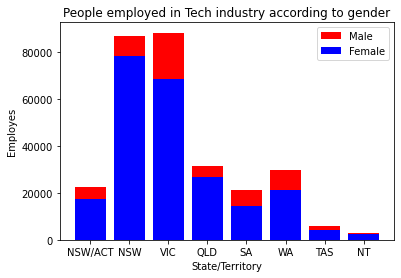

In [ ]:
x=Tech_Services['State/Territory']
male_employed=Tech_Services['Employed - Male']
female_employed=Tech_Services['Employed - Female']
plt.bar(x, male_employed, color='r')
plt.bar(x, female_employed, color='b')
plt.xlabel("State/Territory")
plt.ylabel("Employes")
plt.legend(["Male", "Female"])
plt.title("People employed in Tech industry according to gender")
plt.show()